<a href="https://colab.research.google.com/github/Bommireddypally/Miniprojects/blob/main/04-housing-prediction/housing_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

HOUSING PRICE PREDICTION

[1/8] Loading housing data...
Dataset shape: (20640, 9)

Feature descriptions:
  • MedInc: Median income in block group
  • HouseAge: Median house age in block group
  • AveRooms: Average number of rooms per household
  • AveBedrms: Average number of bedrooms per household
  • Population: Block group population
  • AveOccup: Average household size
  • Latitude: Block group latitude
  • Longitude: Block group longitude

Target variable: MedHouseVal (Median house value in $100,000s)

First few rows:
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  

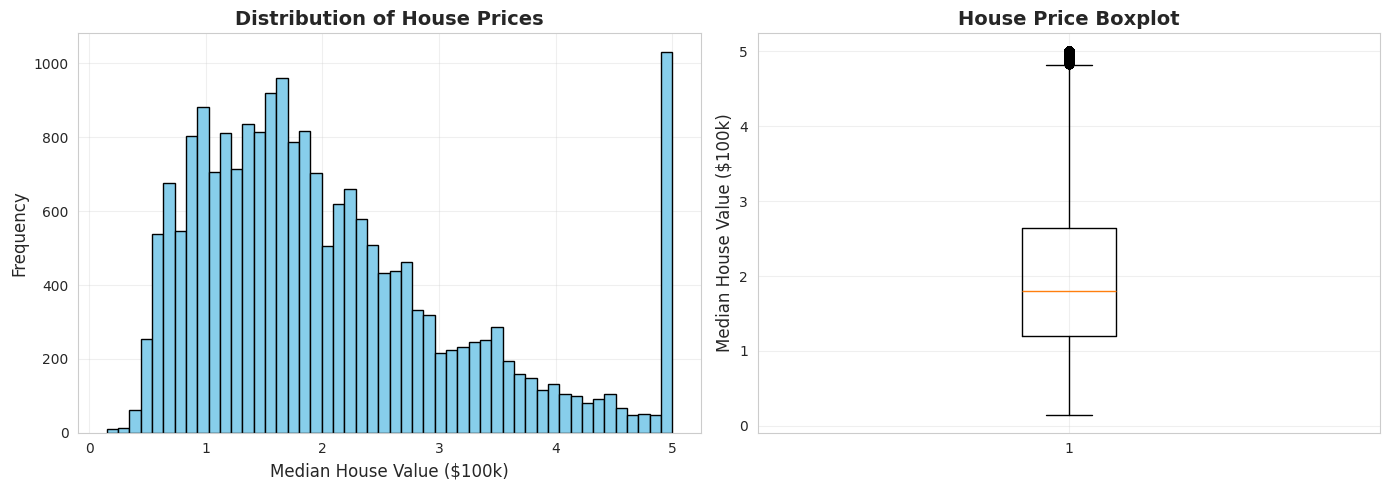


[3/8] Analyzing features and correlations...

Feature Correlations with House Price:
MedHouseVal    1.000000
MedInc         0.688075
AveRooms       0.151948
HouseAge       0.105623
AveOccup      -0.023737
Population    -0.024650
Longitude     -0.045967
AveBedrms     -0.046701
Latitude      -0.144160
Name: MedHouseVal, dtype: float64


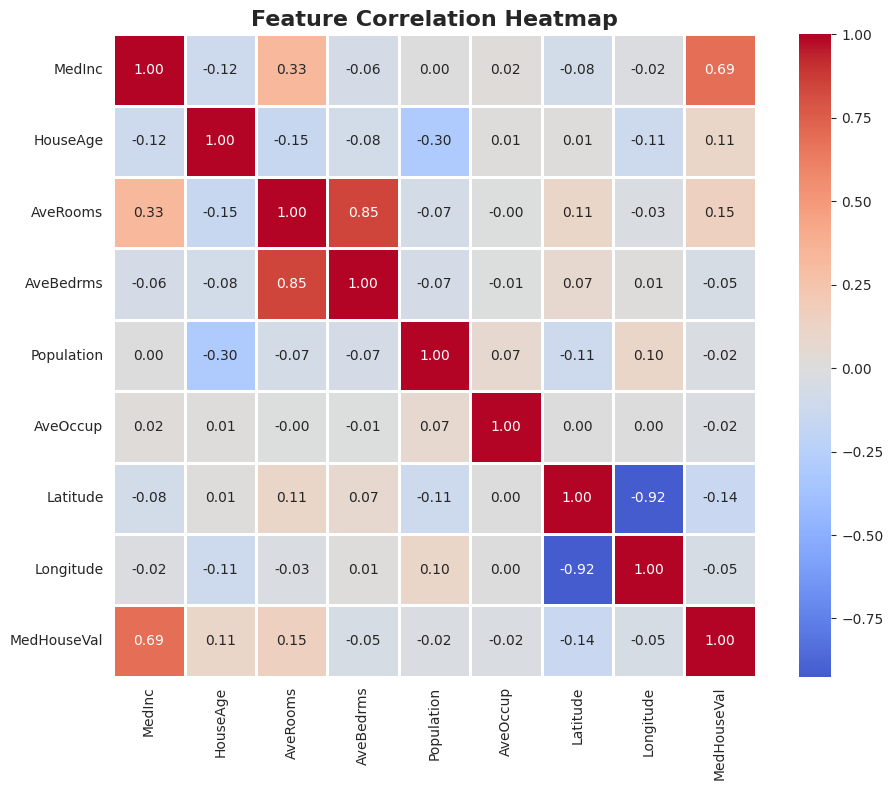

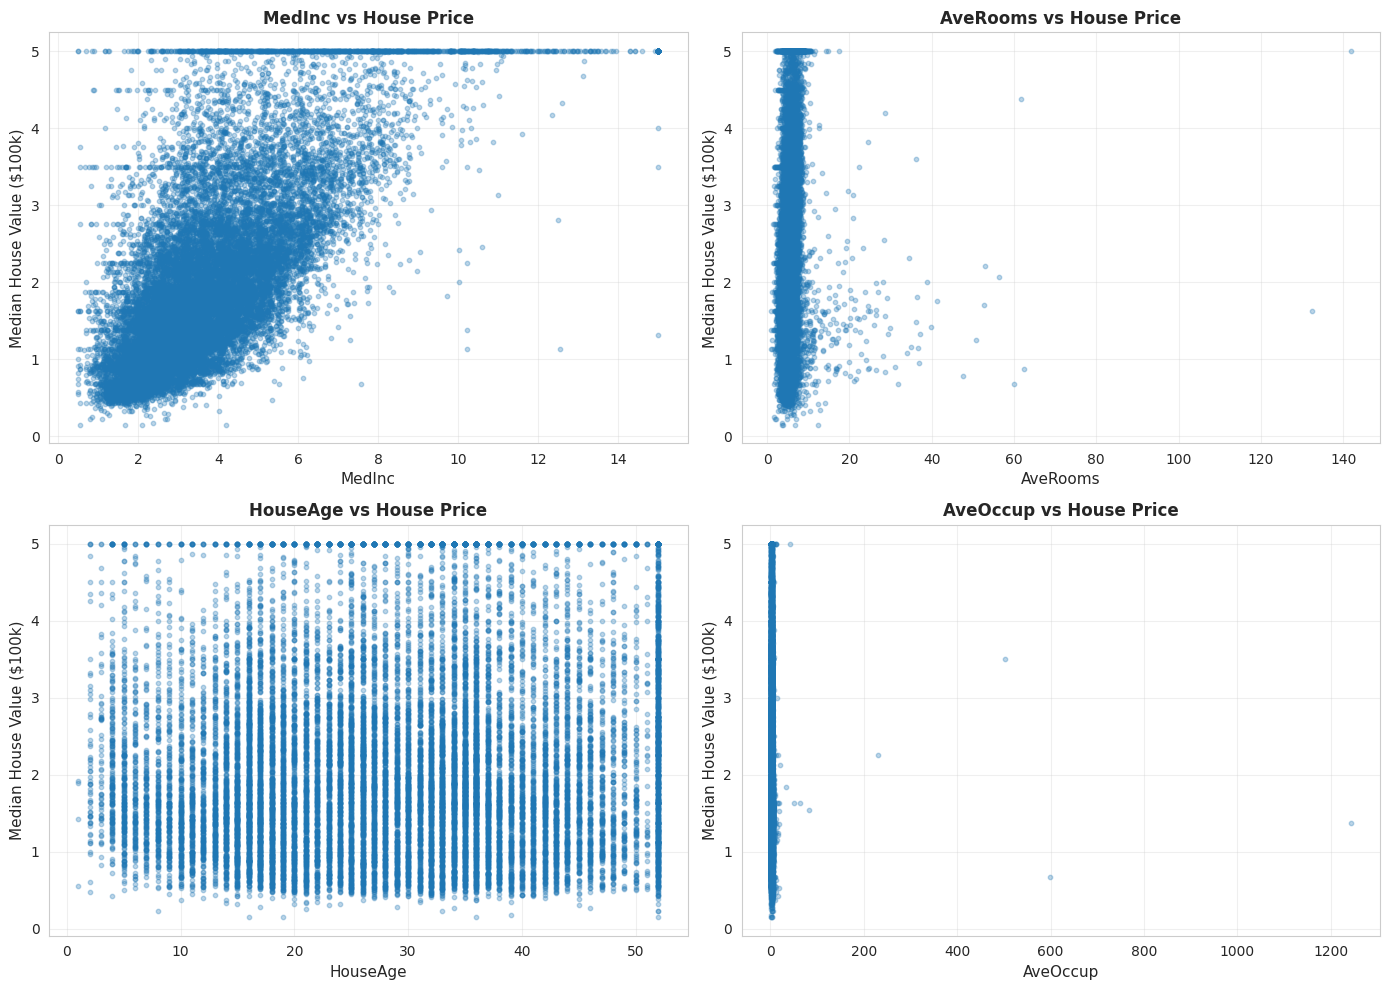


[4/8] Preprocessing data...
✓ Outliers removed: 1071 rows (5.2%)
✓ Final dataset size: 19,569 rows

Creating new features...
✓ Created: RoomsPerHousehold, BedroomsRatio

[5/8] Preparing data for modeling...
Features shape: (19569, 10)
Target shape: (19569,)

Training set: 15,655 samples
Test set: 3,914 samples
✓ Features scaled using StandardScaler

[6/8] Training multiple regression models...

Training models...

  Training Linear Regression...
    ✓ Train R²: 0.6132 | Test R²: 0.6538
    ✓ Test RMSE: 0.5659 | Test MAE: 0.4228
    ✓ CV Score: 0.6067 (±0.0210)

  Training Ridge Regression...
    ✓ Train R²: 0.6132 | Test R²: 0.6538
    ✓ Test RMSE: 0.5659 | Test MAE: 0.4228
    ✓ CV Score: 0.6067 (±0.0210)

  Training Lasso Regression...
    ✓ Train R²: 0.4243 | Test R²: 0.4473
    ✓ Test RMSE: 0.7149 | Test MAE: 0.5564
    ✓ CV Score: 0.4241 (±0.0108)

  Training Decision Tree...
    ✓ Train R²: 0.8033 | Test R²: 0.6569
    ✓ Test RMSE: 0.5633 | Test MAE: 0.3819
    ✓ CV Score: 0.620

In [ ]:
# Housing Price Prediction using Machine Learning
# Predict house prices based on features like location, size, and amenities

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import warnings
warnings.filterwarnings('ignore')

# Set plotting style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

print("="*70)
print("HOUSING PRICE PREDICTION")
print("="*70)

# ============================================
# STEP 1: LOAD THE DATA
# ============================================
# Dataset: California Housing Dataset (built into sklearn) or Kaggle datasets
# Alternative: House Prices - Advanced Regression Techniques (Kaggle)
# Download: https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques

print("\n[1/8] Loading housing data...")

# Option 1: Use California Housing Dataset (built-in, no download needed)
from sklearn.datasets import fetch_california_housing

housing_data = fetch_california_housing(as_frame=True)
df = housing_data.frame

print(f"Dataset shape: {df.shape}")
print("\nFeature descriptions:")
for feature, description in zip(housing_data.feature_names,
                                 ["Median income in block group",
                                  "Median house age in block group",
                                  "Average number of rooms per household",
                                  "Average number of bedrooms per household",
                                  "Block group population",
                                  "Average household size",
                                  "Block group latitude",
                                  "Block group longitude"]):
    print(f"  • {feature}: {description}")

print("\nTarget variable: MedHouseVal (Median house value in $100,000s)")

# Option 2: If using Kaggle dataset, uncomment below:
# df = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')
# Or for Colab:
# df = pd.read_csv('/content/train.csv')

print("\nFirst few rows:")
print(df.head())

# ============================================
# STEP 2: EXPLORATORY DATA ANALYSIS
# ============================================
print("\n" + "="*70)
print("[2/8] Exploring the data...")
print("="*70)

# Basic info
print("\nDataset Info:")
print(df.info())

print("\nStatistical Summary:")
print(df.describe())

# Check for missing values
print("\nMissing Values:")
missing = df.isnull().sum()
if missing.sum() > 0:
    print(missing[missing > 0])
else:
    print("✓ No missing values!")

# Target variable distribution
print("\nTarget Variable Statistics:")
print(df['MedHouseVal'].describe())

# Visualize target distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].hist(df['MedHouseVal'], bins=50, edgecolor='black', color='skyblue')
axes[0].set_xlabel('Median House Value ($100k)', fontsize=12)
axes[0].set_ylabel('Frequency', fontsize=12)
axes[0].set_title('Distribution of House Prices', fontsize=14, fontweight='bold')
axes[0].grid(True, alpha=0.3)

axes[1].boxplot(df['MedHouseVal'], vert=True)
axes[1].set_ylabel('Median House Value ($100k)', fontsize=12)
axes[1].set_title('House Price Boxplot', fontsize=14, fontweight='bold')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# ============================================
# STEP 3: FEATURE ANALYSIS & CORRELATION
# ============================================
print("\n" + "="*70)
print("[3/8] Analyzing features and correlations...")
print("="*70)

# Correlation with target
correlations = df.corr()['MedHouseVal'].sort_values(ascending=False)
print("\nFeature Correlations with House Price:")
print(correlations)

# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', center=0,
            fmt='.2f', square=True, linewidths=1)
plt.title('Feature Correlation Heatmap', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# Scatter plots for top correlated features
top_features = correlations.index[1:5]  # Top 4 features (excluding target itself)
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

for idx, feature in enumerate(top_features):
    axes[idx].scatter(df[feature], df['MedHouseVal'], alpha=0.3, s=10)
    axes[idx].set_xlabel(feature, fontsize=11)
    axes[idx].set_ylabel('Median House Value ($100k)', fontsize=11)
    axes[idx].set_title(f'{feature} vs House Price', fontsize=12, fontweight='bold')
    axes[idx].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# ============================================
# STEP 4: DATA PREPROCESSING
# ============================================
print("\n" + "="*70)
print("[4/8] Preprocessing data...")
print("="*70)

# Handle missing values if any (California Housing has none, but good practice)
if df.isnull().sum().sum() > 0:
    print("Handling missing values...")
    # For numerical columns, fill with median
    numerical_cols = df.select_dtypes(include=[np.number]).columns
    df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].median())
    print("✓ Missing values handled")

# Remove outliers (optional - using IQR method)
def remove_outliers(df, column, threshold=3):
    """Remove outliers using IQR method"""
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - threshold * IQR
    upper_bound = Q3 + threshold * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

original_size = len(df)
df = remove_outliers(df, 'MedHouseVal', threshold=1.5)
print(f"✓ Outliers removed: {original_size - len(df)} rows ({(original_size - len(df))/original_size*100:.1f}%)")
print(f"✓ Final dataset size: {len(df):,} rows")

# Feature Engineering (create new features)
print("\nCreating new features...")
df['RoomsPerHousehold'] = df['AveRooms'] / df['AveOccup']
df['BedroomsRatio'] = df['AveBedrms'] / df['AveRooms']
print("✓ Created: RoomsPerHousehold, BedroomsRatio")

# ============================================
# STEP 5: PREPARE DATA FOR MODELING
# ============================================
print("\n" + "="*70)
print("[5/8] Preparing data for modeling...")
print("="*70)

# Separate features and target
X = df.drop('MedHouseVal', axis=1)
y = df['MedHouseVal']

print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"\nTraining set: {X_train.shape[0]:,} samples")
print(f"Test set: {X_test.shape[0]:,} samples")

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("✓ Features scaled using StandardScaler")

# ============================================
# STEP 6: TRAIN MULTIPLE MODELS
# ============================================
print("\n" + "="*70)
print("[6/8] Training multiple regression models...")
print("="*70)

# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0),
    'Lasso Regression': Lasso(alpha=0.1),
    'Decision Tree': DecisionTreeRegressor(max_depth=10, random_state=42),
    'Random Forest': RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, max_depth=5, random_state=42)
}

# Store results
results = {}

print("\nTraining models...")
for name, model in models.items():
    print(f"\n  Training {name}...")

    # Train the model
    model.fit(X_train_scaled, y_train)

    # Make predictions
    y_pred_train = model.predict(X_train_scaled)
    y_pred_test = model.predict(X_test_scaled)

    # Calculate metrics
    train_r2 = r2_score(y_train, y_pred_train)
    test_r2 = r2_score(y_test, y_pred_test)
    train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
    test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
    test_mae = mean_absolute_error(y_test, y_pred_test)

    # Cross-validation score
    cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5,
                                 scoring='r2')

    results[name] = {
        'model': model,
        'train_r2': train_r2,
        'test_r2': test_r2,
        'train_rmse': train_rmse,
        'test_rmse': test_rmse,
        'test_mae': test_mae,
        'cv_mean': cv_scores.mean(),
        'cv_std': cv_scores.std(),
        'predictions': y_pred_test
    }

    print(f"    ✓ Train R²: {train_r2:.4f} | Test R²: {test_r2:.4f}")
    print(f"    ✓ Test RMSE: {test_rmse:.4f} | Test MAE: {test_mae:.4f}")
    print(f"    ✓ CV Score: {cv_scores.mean():.4f} (±{cv_scores.std():.4f})")

# ============================================
# STEP 7: MODEL COMPARISON
# ============================================
print("\n" + "="*70)
print("[7/8] Comparing model performance...")
print("="*70)

# Create comparison DataFrame
comparison_df = pd.DataFrame({
    'Model': list(results.keys()),
    'Train R²': [results[m]['train_r2'] for m in results],
    'Test R²': [results[m]['test_r2'] for m in results],
    'Test RMSE': [results[m]['test_rmse'] for m in results],
    'Test MAE': [results[m]['test_mae'] for m in results],
    'CV Score': [results[m]['cv_mean'] for m in results]
})

comparison_df = comparison_df.sort_values('Test R²', ascending=False)
print("\n" + comparison_df.to_string(index=False))

# Visualize model comparison
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# R² Score comparison
axes[0].barh(comparison_df['Model'], comparison_df['Test R²'], color='skyblue', edgecolor='black')
axes[0].set_xlabel('R² Score', fontsize=12)
axes[0].set_title('Model Comparison - R² Score', fontsize=14, fontweight='bold')
axes[0].grid(True, alpha=0.3, axis='x')

# RMSE comparison
axes[1].barh(comparison_df['Model'], comparison_df['Test RMSE'], color='coral', edgecolor='black')
axes[1].set_xlabel('RMSE', fontsize=12)
axes[1].set_title('Model Comparison - RMSE (Lower is Better)', fontsize=14, fontweight='bold')
axes[1].grid(True, alpha=0.3, axis='x')

# MAE comparison
axes[2].barh(comparison_df['Model'], comparison_df['Test MAE'], color='lightgreen', edgecolor='black')
axes[2].set_xlabel('MAE', fontsize=12)
axes[2].set_title('Model Comparison - MAE (Lower is Better)', fontsize=14, fontweight='bold')
axes[2].grid(True, alpha=0.3, axis='x')

plt.tight_layout()
plt.show()

# Find best model
best_model_name = comparison_df.iloc[0]['Model']
best_model = results[best_model_name]['model']

print(f"\n🏆 Best Model: {best_model_name}")
print(f"   • Test R²: {results[best_model_name]['test_r2']:.4f}")
print(f"   • Test RMSE: {results[best_model_name]['test_rmse']:.4f}")
print(f"   • Test MAE: ${results[best_model_name]['test_mae']*100:.2f}k")

# ============================================
# STEP 8: MODEL EVALUATION & VISUALIZATION
# ============================================
print("\n" + "="*70)
print("[8/8] Evaluating best model...")
print("="*70)

# Actual vs Predicted plot
y_pred_best = results[best_model_name]['predictions']

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Scatter plot
axes[0].scatter(y_test, y_pred_best, alpha=0.5, s=20)
axes[0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
             'r--', lw=2, label='Perfect Prediction')
axes[0].set_xlabel('Actual Price ($100k)', fontsize=12)
axes[0].set_ylabel('Predicted Price ($100k)', fontsize=12)
axes[0].set_title(f'{best_model_name}: Actual vs Predicted', fontsize=14, fontweight='bold')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Residual plot
residuals = y_test - y_pred_best
axes[1].scatter(y_pred_best, residuals, alpha=0.5, s=20)
axes[1].axhline(y=0, color='r', linestyle='--', lw=2)
axes[1].set_xlabel('Predicted Price ($100k)', fontsize=12)
axes[1].set_ylabel('Residuals', fontsize=12)
axes[1].set_title('Residual Plot', fontsize=14, fontweight='bold')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Feature importance (for tree-based models)
if best_model_name in ['Random Forest', 'Gradient Boosting', 'Decision Tree']:
    feature_importance = pd.DataFrame({
        'Feature': X.columns,
        'Importance': best_model.feature_importances_
    }).sort_values('Importance', ascending=False)

    print("\nTop 10 Most Important Features:")
    print(feature_importance.head(10).to_string(index=False))

    # Plot feature importance
    plt.figure(figsize=(10, 6))
    plt.barh(feature_importance['Feature'].head(10),
             feature_importance['Importance'].head(10),
             color='teal', edgecolor='black')
    plt.xlabel('Importance', fontsize=12)
    plt.title(f'Top 10 Feature Importances - {best_model_name}',
              fontsize=14, fontweight='bold')
    plt.gca().invert_yaxis()
    plt.grid(True, alpha=0.3, axis='x')
    plt.tight_layout()
    plt.show()

# ============================================
# PREDICTION EXAMPLES
# ============================================
print("\n" + "="*70)
print("SAMPLE PREDICTIONS")
print("="*70)

# Show some example predictions
sample_size = 5
sample_indices = np.random.choice(len(y_test), sample_size, replace=False)

print(f"\nRandom {sample_size} predictions:")
print(f"{'Actual Price':<15} {'Predicted Price':<18} {'Difference':<15} {'Error %'}")
print("-" * 70)

for idx in sample_indices:
    actual = y_test.iloc[idx]
    predicted = y_pred_best[idx]
    difference = predicted - actual
    error_pct = abs(difference / actual * 100)

    print(f"${actual*100:.2f}k{'':<8} ${predicted*100:.2f}k{'':<11} "
          f"${difference*100:+.2f}k{'':<8} {error_pct:.1f}%")

# ============================================
# SAVE MODEL AND RESULTS
# ============================================
print("\n" + "="*70)
print("Saving results...")
print("="*70)

# Save predictions
predictions_df = pd.DataFrame({
    'Actual_Price': y_test.values,
    'Predicted_Price': y_pred_best,
    'Difference': y_pred_best - y_test.values,
    'Error_Percentage': abs((y_pred_best - y_test.values) / y_test.values * 100)
})
predictions_df.to_csv('housing_predictions.csv', index=False)
print("✓ Predictions saved to: housing_predictions.csv")

# Save model comparison
comparison_df.to_csv('model_comparison.csv', index=False)
print("✓ Model comparison saved to: model_comparison.csv")

# ============================================
# FINAL SUMMARY
# ============================================
print("\n" + "="*70)
print("ANALYSIS COMPLETE! 🎉")
print("="*70)

print(f"\n📊 Summary:")
print(f"   • Dataset size: {len(df):,} houses")
print(f"   • Features used: {X.shape[1]}")
print(f"   • Best model: {best_model_name}")
print(f"   • R² Score: {results[best_model_name]['test_r2']:.4f} "
      f"({results[best_model_name]['test_r2']*100:.1f}% variance explained)")
print(f"   • Average prediction error: ${results[best_model_name]['test_mae']*100:.2f}k")

print(f"\n💡 Model Interpretation:")
print(f"   • The model explains {results[best_model_name]['test_r2']*100:.1f}% of price variation")
print(f"   • Predictions are typically off by ${results[best_model_name]['test_mae']*100:.2f}k")
print(f"   • Model is {'reliable' if results[best_model_name]['test_r2'] > 0.7 else 'decent' if results[best_model_name]['test_r2'] > 0.5 else 'needs improvement'}")

print(f"\n📁 Output Files:")
print(f"   • housing_predictions.csv - Test set predictions")
print(f"   • model_comparison.csv - All models performance")

print(f"\n🚀 Next Steps:")
print(f"   1. Try feature engineering (add more features)")
print(f"   2. Tune hyperparameters for better performance")
print(f"   3. Try ensemble methods")
print(f"   4. Deploy model as API or web app")